# AP1 - Manipulation de données électrophysiologiques dans MNE-Python
Ce tutoriel sont traduits et adaptés de [ceux de Dr. Jas](https://jasmainak.github.io/mne-workshop-brown/readme.html), n'hésitez pas à aller les consulter pour aller plus loin. Les tutoriels disponibles dans la [documentation de MNE-Python](https://mne.tools/stable/auto_tutorials/index.html) sont aussi une excellente ressource.

Pour toute question, vous pouvez me contacter à yharel109@gmail.com

## Introduction de l'activité
À travers ces 4 activités pratiques, vous apprendrez à utiliser des outils de programmation pour traîter et d'analyser des données électrophysiologiques. Au terme de ces tutoriels, vous aurez exploré, nettoyé et analysé des données d'entraînement à l'aide de différentes approches communément utilisées en neurosciences cognitives.  
Le premier de ces outils est [MNE-Python](https://mne.tools/stable/index.html), une librairie permettant la manipulation de jeux de données électrophysiologiques, incluant de la MEG, l'EEG, l'EEG intra-crânien et la polysomnographie (une combinaison d'EEG, d'ECG et d'EMG).  

MNE-Python est une sorte de couteau-suisse du traîtement de données cérébrales.
![eeg_swissknife](https://i.ibb.co/y0Rnw9T/eeg-swissknfife.png)

Au cours du traîtement, les données prennent différentes formes, des données brutes (*raw*), des segments (*epochs*), des potentiels évoqués (*evoked potentials*), des cartes temps-fréquence et autres.
Les objets de MNE-Python permettent d'associer les données sous différentes formes à leur meta-data, c'est-à-dire aux informations complémentaires à l'enregistrement qui facilitent leur lecture. Chaque objet possède des [méthodes](https://docs.python.org/3/tutorial/classes.html#method-objects) qui lui sont propres, c'est-à-dire des fonctions qui s'appliquent sur ces objets pour les transformer ou pour tracer des graphiques afin de les explorer.


Au cours de cette première activité, nous allons donc découvrir comment les données M/EEG sont couramment stockées et manipulées par MNE-Python et comment nous pouvons les explorer sommairement.



## Imports

Pour commencer, nous devons installer les librairies nécessaires. Si vous utilisez le notebook via Binder (en ligne), alors vous devez roulez la cellule suivante. Sinon, si vous roulez le notebook localement sur votre ordinateur, vous pouvez utiliser le fichier requirements.txt pour installer les librairies. Pour cela, activez votre environnement et faites  

    pip install -r requirements.txt

In [1]:
!pip install mne
!pip install matplotlib
!pip install pooch
!pip install tqdm

Maintenant, importons mne. Pour ce tutoriel, nous importerons toute la librairie et nous utiliserons les noms des fonctions au complet afin de rendre explicite les différents modules de MNE.

In [2]:
import mne
import os.path as op
import os
import matplotlib.pyplot as plt

# Pour activer les graphs interactifs, dé-commentez cette ligne et commentez la ligne au dessous
#%matplotlib qt 
%matplotlib inline

## Charger les données

Différents formats de fichiers existent pour stocker les données électrophysiologiques. Ils peuvent être reconnus à leur extension, c'est à dire à la suite de caractères qui succède au . dans le nom du fichier. Chaque format a une différente manière de représenter les données et leurs méta-données, mais la plupart du temps, le fichier est composé d'un *header* (contenant les méta-données) et d'un *body*, contenant les données elles-mêmes (ex. les signaux mesurés sur les différents capteurs, le plus souvent accompagnées d'un canal encodant les évènements liés à l'expérience).  
Certains formats sont plus courants que d'autres, certains sont libres, certains sont propriétaires, mais tous ont leurs avantages et inconvénients. Généralement, chaque constructeur de M/EEG possède son propre format, mais heureusement MNE-Python a les moyens de lire la plupart d'entre eux. Quelques-uns des plus courants sont :

- EDF ou EDF+ (.edf) : [European Data Format(+)](https://www.edfplus.info/index.html). Format open source assez standard et versatile. Permet d'encoder des données EEG et MEG, et même EKG/EMG dans sa version étendue (+)
- FIF (.fif) : ?. Alternative au format EDF avec à peu près les mêmes avantages, c'est le plus utilisé par MNE-Python. 
- SET (.set) : Format propre à [EEGLAB](https://sccn.ucsd.edu/eeglab/index.php), une autre librairie d'analyse M/EEG qui fonctionne sous Matlab.
- CTF, CNT, BDF etc... : Autres formats. Mon conseil ce serait que vous transformiez vos données en l'un des formats ci-dessus (FIF ou EDF), et que vous vous éloignez dès que possible de cette engeance démoniaque que sont les formats propriétaires. 

Dans notre exemple, les données sont au format FIF. Nous utiliserons donc la fonction [mne.io.read_raw_fif](https://mne.tools/stable/generated/mne.io.read_raw_fif.html#mne.io.read_raw_fif). Prenez un moment pour jeter un oeil à sa documentation. D'autres fonctions sont disponibles [ici](https://mne.tools/stable/reading_raw_data.html) pour lire les autres formats.

En chargeant les données, un objet mne.io.[Raw](https://mne.tools/stable/generated/mne.io.Raw.html) va être créer.

In [3]:
# Créé un path vers le dataset de tutoriel. 
# Ce dataset sera téléchargé automatiquement lorsque le fichier sera appelé pour la première fois.
data_path = op.join(mne.datasets.sample.data_path(), 'MEG',
                    'sample', 'sample_audvis_raw.fif')

# Charge les données et crée un objet mne.io.Raw()
raw = mne.io.read_raw_fif(data_path, preload=True) # Le paramètre preload=False permet de sauver de la mémoire lorsqu'on a pas besoin de charger les données immédiatement mais juste d'accéder aux métadonnées


Verifying hash 12b75d1cb7df9dfb4ad73ed82f61094f.
Decompressing the archive: /home/hyruuk/mne_data/MNE-sample-data-processed.tar.gz
(please be patient, this can take some time)
Successfully extracted to: ['/home/hyruuk/mne_data/MNE-sample-data']
Opening raw data file /home/hyruuk/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


N'importe quel conteneur de données de MNE-Python peut être sauvegardé en utilisant la méthode [.save()](https://mne.tools/stable/generated/mne.io.Raw.html?highlight=save#mne.io.Raw.save). Essayons avec notre objet Raw.  
L'attribut "overwrite" permet de forcer l'enregistrement des données si le fichier existe déjà. À utiliser avec précaution donc.

In [4]:
data_path = op.join(mne.datasets.sample.data_path(), 'MEG',
                    'sample', 'sample_audvis_raw.fif')
raw.save(data_path, overwrite=True)

Overwriting existing file.
Writing /home/hyruuk/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif
Closing /home/hyruuk/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif
[done]


## Objet mne.io.[Raw](https://mne.tools/stable/generated/mne.io.Raw.html)

Les objets Raw contiennent des données continues (c'est-à-dire non-segmentées). Ils sont constitués d'une [structure d'information](https://mne.tools/stable/generated/mne.Info.html), et d'un [numpy.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) qui contient les données.   
Lorsqu'on appelle un objet raw sans spécifier de méthode, sa structure d'information s'affiche. Il s'agit des métadonnées du fichier. Vous y trouverez diverses informations utiles pour le reste du chemin, comme la fréquence d'échantillonage, le nombre et le type de canaux, la présence de filtre *hardware* pendant l'enregistrement etc...

In [5]:
raw # Équivalent à raw.info

<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.8 MB, data loaded>

Il est aussi possible d'accéder aux métadonnées en les appelant directement par le [dictionnaire](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) raw.info ou par les [attributs](https://docs.python.org/3/tutorial/classes.html#python-scopes-and-namespaces) de l'objet Raw.

In [6]:
# Give the sample rate
print('sample rate:', raw.info['sfreq'], 'Hz')
# Give the size of the data matrix
print('%s channels x %s samples' % (len(raw.ch_names), len(raw.times)))

sample rate: 600.614990234375 Hz
376 channels x 166800 samples


De la même manière, on peut accéder à l'array contenant les données.

In [7]:
raw.get_data()

array([[ 9.64355481e-12,  0.00000000e+00,  0.00000000e+00, ...,
        -1.92871096e-12,  2.89306644e-12,  3.85742192e-12],
       [-4.82177740e-12, -2.89306644e-12, -9.64355481e-13, ...,
        -9.64355481e-13, -9.64355481e-13, -1.92871096e-12],
       [ 1.01074222e-13,  6.31713890e-14,  7.58056668e-14, ...,
        -4.80102556e-13, -6.06445334e-13, -5.93811056e-13],
       ...,
       [ 3.88542173e-05,  4.07510373e-05,  4.09957883e-05, ...,
         6.72453304e-05,  6.68782039e-05,  6.91421504e-05],
       [ 6.58391126e-05,  6.80025648e-05,  6.81779798e-05, ...,
         8.51932390e-05,  8.58948991e-05,  8.89938982e-05],
       [ 2.85661012e-04,  2.83699953e-04,  2.80431520e-04, ...,
         2.64089357e-04,  2.62781984e-04,  2.57552492e-04]])

Il est aussi possible d'indexer des données directement sur l'objet Raw, comme pour un array. Ça peut permettre, par exemplem de sélectionner une portion des données.

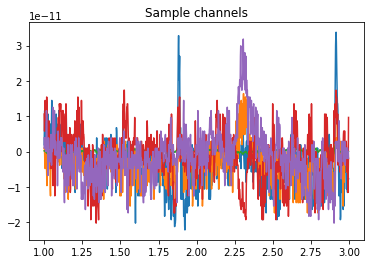

In [8]:
# Extract data from the first 5 channels, from 1 s to 3 s.
sfreq = raw.info['sfreq']
data, times = raw[:5, int(sfreq * 1):int(sfreq * 3)]
_ = plt.plot(times, data.T)
_ = plt.title('Sample channels')

Mais en général, il vaut mieux sélectionner des données en utilisant les méthodes à votre disposition. Puisque ces fonctions transforment l'objet Raw, il vaut mieux les appliquer sur une copie de celui-ci si l'on veut préserver notre objet original intact. Pour cela on utilise .copy()  
Par exemple : 

In [9]:
meg_only = raw.copy().pick_types(meg=True)
eeg_only = raw.copy().pick_types(meg=False, eeg=True)

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


Ces fonctions sont plus flexibles et facilitent la manipulation. Par exemple, [Raw.pick_types()](https://mne.tools/stable/generated/mne.io.Raw.html?highlight=raw%20pick_types#mne.io.Raw.pick_types) peut sélectionner uniquement certains types de capteurs MEG si on les spécifie sous forme de *string*.

In [10]:
grad_only = raw.copy().pick_types(meg='grad')

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


Il est aussi possible de spécifier des noms de canaux directement. Ces noms se trouvent normalement dans l'attribut raw.ch_names.

In [11]:
pick_chans = ['MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123']
specific_chans = raw.copy().pick_channels(pick_chans)

<Raw | sample_audvis_raw.fif, 305 x 166800 (277.7 s), ~391.4 MB, data loaded>
<Raw | sample_audvis_raw.fif, 59 x 166800 (277.7 s), ~78.0 MB, data loaded>
<Raw | sample_audvis_raw.fif, 203 x 166800 (277.7 s), ~261.4 MB, data loaded>
<Raw | sample_audvis_raw.fif, 4 x 166800 (277.7 s), ~8.0 MB, data loaded>


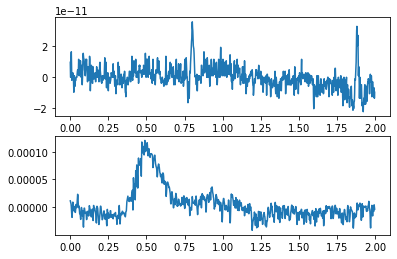

In [12]:
print(meg_only)
print(eeg_only)
print(grad_only)
print(specific_chans)

# Créé un plot basique avec matplotlib
f, (a1, a2) = plt.subplots(2, 1)
eeg, times = eeg_only[0, :int(sfreq * 2)]
meg, times = meg_only[0, :int(sfreq * 2)]
a1.plot(times, meg[0])
a2.plot(times, eeg[0])

Après toutes ces copies, libérons un peu de mémoire. 

In [13]:
del eeg, meg, meg_only, grad_only, eeg_only, data, specific_chans

Vous pouvez aussi utiliser une méthode pour sélectionner un segment de données. Avec cette fonction, vous pouvez directement spécifier les bornes du segment en secondes.

In [14]:
raw = raw.crop(0, 50)  # in seconds
print('New time range from', raw.times.min(), 's to', raw.times.max(), 's')

New time range from 0.0 s to 50.00041705299622 s


Ou vous débarasser d'un canal en particulier.

In [15]:
nchan = raw.info['nchan']
raw = raw.drop_channels(['MEG 0241', 'EEG 001'])
print('Number of channels reduced from', nchan, 'to', raw.info['nchan'])

Number of channels reduced from 376 to 374


Il est possible de "re-coller" plusieurs portions de signal entre elles. Il suffit que leurs métadonnées soient compatibles. Ça peut être utile si l'on veut retirer une partie du signal inutile pour l'analyse (par exemple des artefacts). 

In [16]:
# Create multiple Raw objects
raw1 = raw.copy().crop(0, 10)
raw2 = raw.copy().crop(10, 20)
raw3 = raw.copy().crop(20, 40)

# Concatenate in time (also works without preloading)
raw1.append([raw2, raw3])
print('Time extends from', raw1.times.min(), 's to', raw1.times.max(), 's')

Time extends from 0.0 s to 40.00399655463821 s


Enfin, plusieurs méthodes permettent de visualer les données. La plus basique est la fonction [Raw.plot()](https://mne.tools/stable/generated/mne.io.Raw.html?highlight=raw%20plot#mne.io.Raw.plot) (rappel : allez jeter un oeil à la documentation, il y a beaucoup de paramètre utiles !). Elle permet de créer un tracé des données qui peut être interactif si vous avez activé le bon [*backend* de matplotlib](https://matplotlib.org/1.5.1/faq/usage_faq.html#what-is-a-backend) au début du notebook. 

Cette fonction est très puissante. Quelques choses à savoir :
- Les canaux MEG sont affichés en bleu, les canaux EEG sont en noir.
- Les canaux marqués comme *bad* sont en gris, et peuvent se voir sur la bar de défilement vertical
- Cliquer sur les canaux permet des les marquer comme *bad* interactivement
- Les touches +/- permettent d'ajuster l'échelle des données
- Les paramètres d'échelle initiaux peuvent être ajustés dans les paramètres de la fonction.
- Si vous ne connaissez pas l'échelle de votre signal, laissez les paramètres par défaut ou essayer scalings='auto'
- Avec les touches *pageup/pagedown* et *home/end*  vous pouvez ajuster la quantité de données affichées

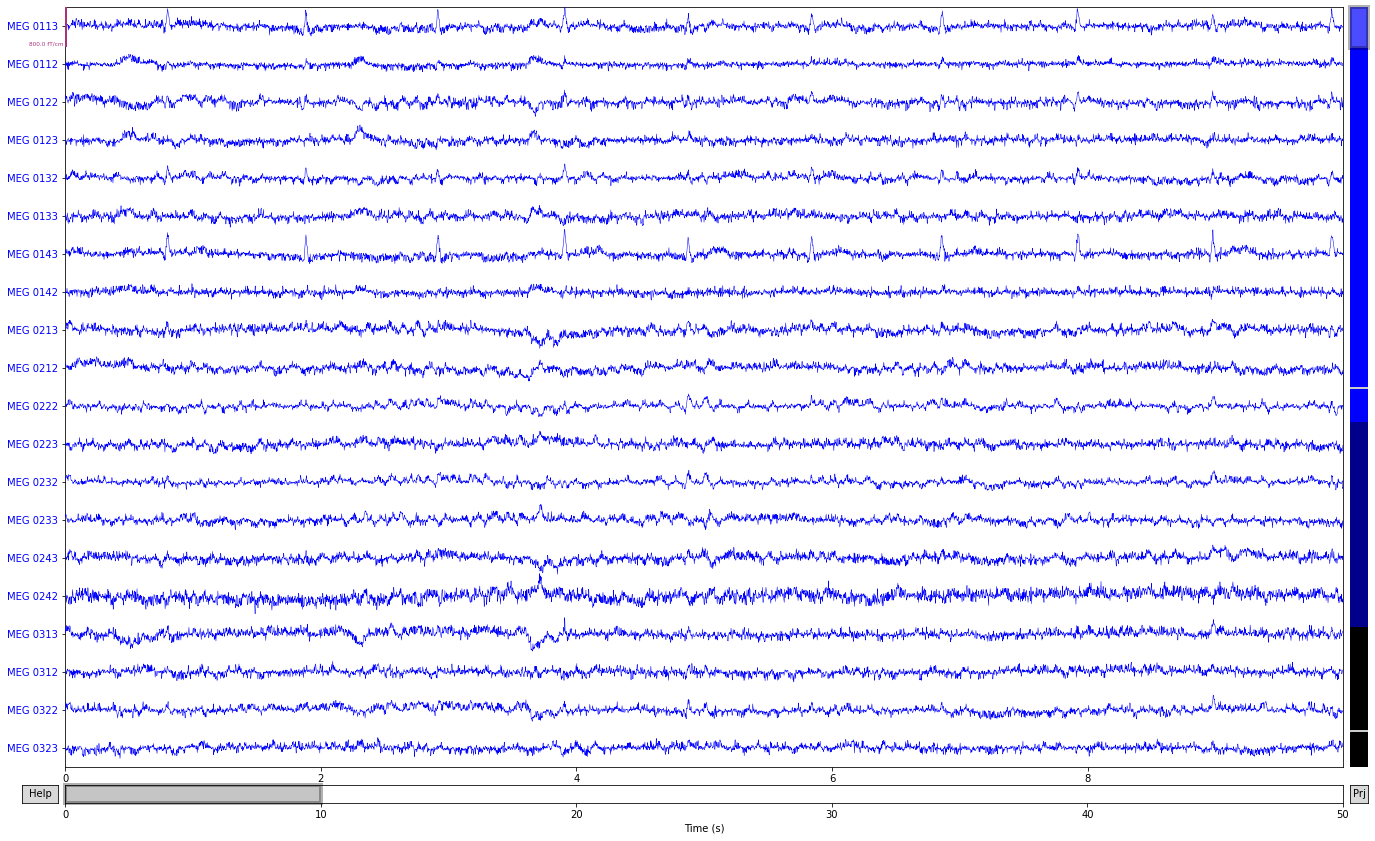

In [17]:
raw.plot();

Il est aussi possible de tracer le spectre du signal avec la fonction [Raw.plot_psd()](https://mne.tools/stable/generated/mne.io.Raw.html?highlight=raw%20plot_psd#mne.io.Raw.plot_psd).
C'est utile afin d'inspecter :
- Le bruit de la ligne électrique
- La présence de canaux bruités
- Les canaux encodant les mouvements de la tête
- Si les données ont reçu du traîtement (ex. filtrage)

Effective window size : 3.410 (s)


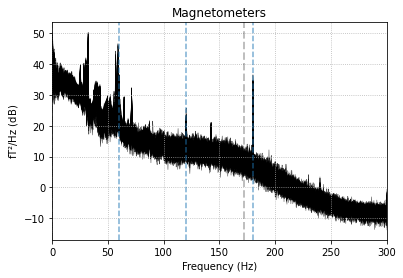

In [18]:
fig, ax = plt.subplots(1, 1)
raw.copy().pick_types(meg='mag').plot_psd(spatial_colors=False, show=False,
                                          ax=ax);
for freq in [60., 120., 180.]:
    ax.axvline(freq, linestyle='--', alpha=0.6)


Enfin, on peut sauvegarder les données avec la méthode [Raw.save()](https://mne.tools/stable/generated/mne.io.Raw.html?highlight=raw%20save#mne.io.Raw.save).

In [19]:
new_data_path = op.join(mne.datasets.sample.data_path(), 'MEG',
                    'sample', 'sample_audvis_raw_processed.fif')
raw.save(new_data_path, overwrite=True)

Writing /home/hyruuk/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw_processed.fif
Closing /home/hyruuk/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw_processed.fif
[done]


<ipython-input-19-51e57d5475b5>:3: RuntimeWarning: This filename (/home/hyruuk/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_data_path, overwrite=True)


## Objet [mne.Epoch](https://mne.tools/stable/generated/mne.Epochs.html)
Les données se trouvent parfois sous forme segmentée, on les appelle alors des "epochs". L'objet [mne.Epoch](https://mne.tools/stable/generated/mne.Epochs.html), comme l'objet Raw, est accompagné d'une structure d'information permettant de comprendre son contenu. Lorsqu'on ouvre un fichier .fif qui contient des epochs avec [mne.read_epochs()](https://mne.tools/stable/generated/mne.read_epochs.html?highlight=read_epochs#mne.read_epochs) un objet Epoch est automatiquement créé.

In [20]:
kiloword_data_file = os.path.join(mne.datasets.kiloword.data_path(),
                                  'kword_metadata-epo.fif')
epochs = mne.read_epochs(kiloword_data_file)


Verifying hash 3a124170795abbd2e48aae8727e719a8.
Decompressing the archive: /home/hyruuk/mne_data/MNE-kiloword-data.tar.gz
(please be patient, this can take some time)
Successfully extracted to: ['/home/hyruuk/mne_data/MNE-kiloword-data']
Reading /home/hyruuk/mne_data/MNE-kiloword-data/kword_metadata-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     920.00 ms
        0 CTF compensation matrices available
Adding metadata with 8 columns
Replacing existing metadata with 8 columns
960 matching events found
No baseline correction applied
0 projection items activated


Ici nous utilisons le dataset "kiloword" puisque celui-ci a déjà été segmenté. Ce jeu de données a été enregistré lors d'une expérience auditive dans laquelle plusieurs mots ont été présentés à un sujet, comme les mots "acid", "film", "cold" etc...
Commençons par afficher les informations de l'objet Epochs :

In [21]:
epochs.info

<Info | 9 non-empty values
 bads: []
 ch_names: Fz, Cz, Pz, C3, Fp1, F7, T7, P7, O1, F3, FC5, CP5, P3, FC1, CP1, ...
 chs: 29 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 1970-01-01 00:00:00 UTC
 meas_id: 4 items (dict)
 nchan: 29
 projs: []
 sfreq: 250.0 Hz
>

De la même manière, on peut facilement tracer un graph interactif ou un spectre moyenné à travers les epochs.

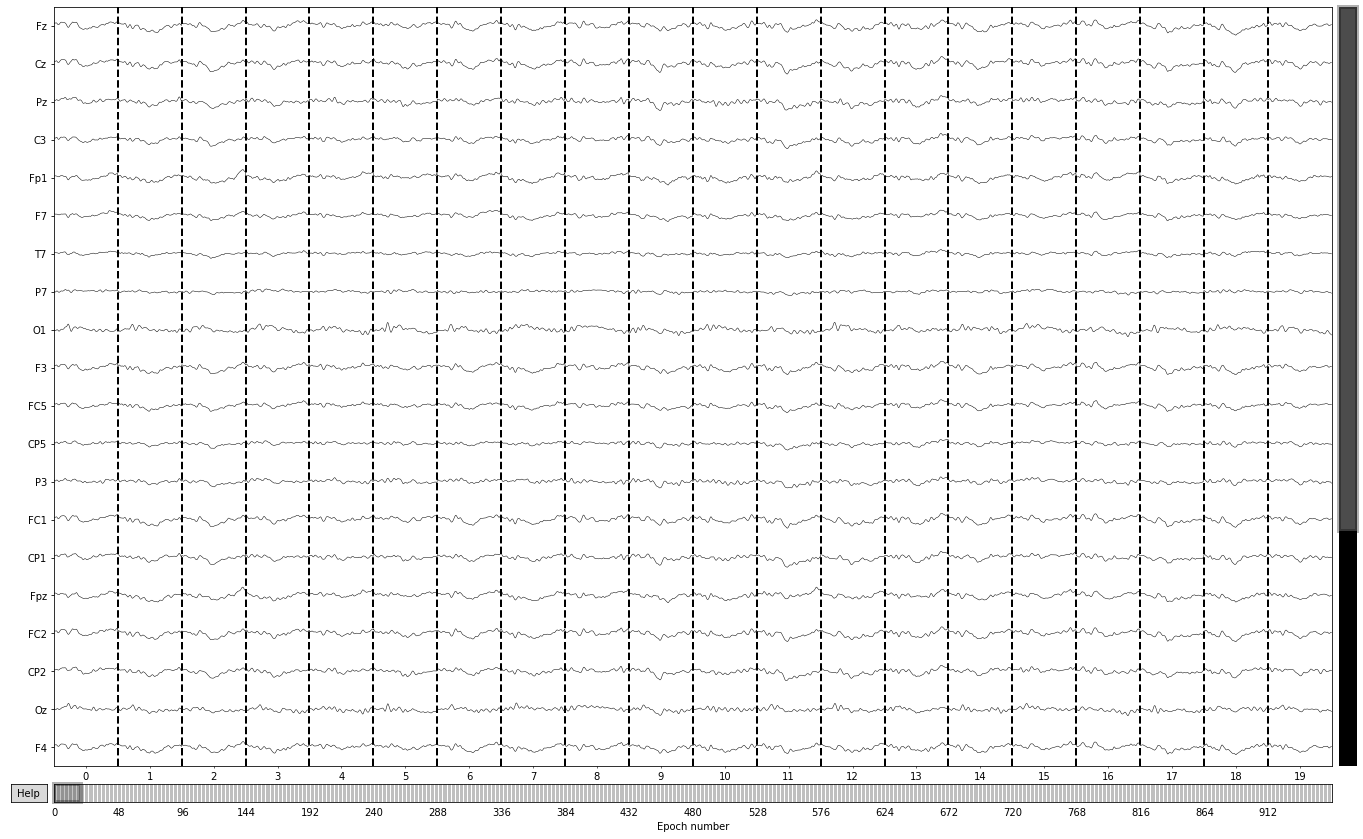

In [22]:
epochs.plot();

    Using multitaper spectrum estimation with 7 DPSS windows


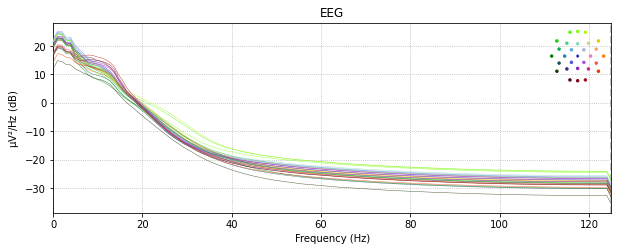

In [23]:
epochs.plot_psd();

Il est possible d'indexer les epochs individuellement ou en passant une liste à l'objet Epochs :

In [24]:
epochs[0]

Number of events,1
Events,film: 1
Time range,-0.100 – 0.920 sec
Baseline,off


In [25]:
epochs[[0,1,2,3,4]] # Équivalent à epochs[:5]

Number of events,5
Events,cent: 1cold: 1film: 1main: 1shot: 1
Time range,-0.100 – 0.920 sec
Baseline,off


Mais la véritable puissance des objets Epochs réside dans leur capacité à manipuler les epochs basé sur des métadonnées. Dans ce dataset, différents mots ont été présentés au sujet. Chaque mot est associé à une epoch, on peut accéder à celle-ci en spécifiant le mot qui nous intéresse à l'objet Epochs. Ça fonctionne aussi avec des conditions expérimentales, c'est donc très efficace pour séparer ses données avant de les comparer.

In [26]:
epochs['acid']

Number of events,1
Events,acid: 1
Time range,-0.100 – 0.920 sec
Baseline,off


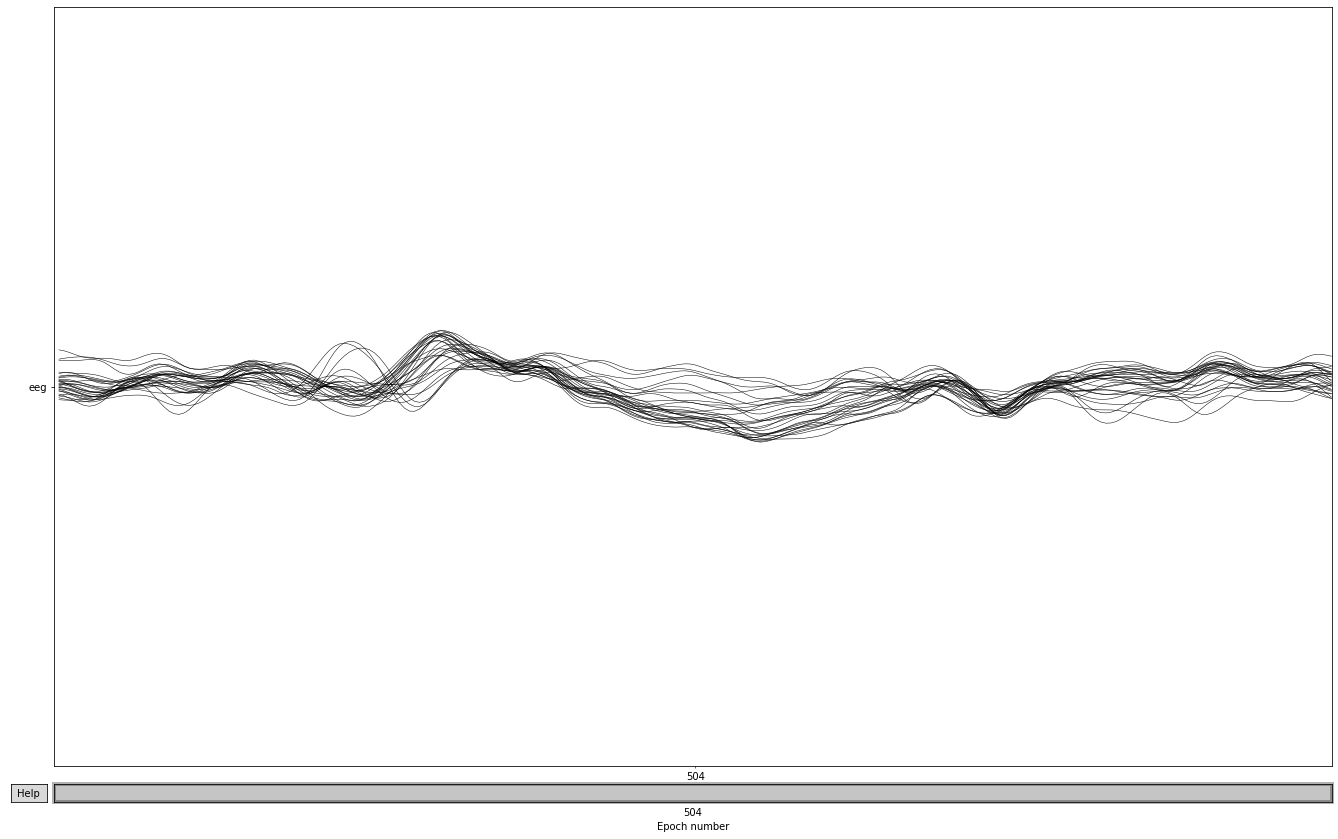

In [27]:
epochs['acid'].plot(butterfly=True);

## Objet [mne.Evoked](https://mne.tools/stable/generated/mne.Evoked.html?highlight=evoked#mne.Evoked)
Lorsqu'on moyenne des epochs on obtient des réponses évoquées. Celles-ci sont stockés dans des objets [mne.Evoked](https://mne.tools/stable/generated/mne.Evoked.html?highlight=evoked#mne.Evoked) qui viennent aussi avec leurs méthodes propres. On peut lire des données évoquées depuis un fichier .fif avec [mne.read_evokeds()](https://mne.tools/stable/generated/mne.read_evokeds.html?highlight=read_evoked).

In [28]:
sample_data_evk_file = os.path.join(mne.datasets.sample.data_path(), 'MEG', 'sample',
                                    'sample_audvis-ave.fif')
evokeds_list = mne.read_evokeds(sample_data_evk_file, verbose=False)
evokeds_list

[<Evoked | 'Left Auditory' (average, N=55), -0.1998 – 0.49949 sec, baseline off, 376 ch, ~4.5 MB>,
 <Evoked | 'Right Auditory' (average, N=61), -0.1998 – 0.49949 sec, baseline off, 376 ch, ~4.5 MB>,
 <Evoked | 'Left visual' (average, N=67), -0.1998 – 0.49949 sec, baseline off, 376 ch, ~4.5 MB>,
 <Evoked | 'Right visual' (average, N=58), -0.1998 – 0.49949 sec, baseline off, 376 ch, ~4.5 MB>]

Cette fois-ci, la fonction nous retourne une liste d'objets Evoked : un par condition expérimentale, qui ont été moyennées séparément. On peut visualiser le premier PE de la liste (Left Auditory) avec, encore une fois, la méthode [Evoked.plot()](https://mne.tools/stable/generated/mne.Evoked.html?highlight=evoked%20plot#mne.Evoked.plot). Notez que si vous avez activé le *backend* interactif cet affichage vous permet de créer rapidement une topomap lorsque vous cliquez sur le signal. Essayez de sélectionner le moment auquel le potentiel est le plus visible et examinez sa topographie. Qu'en pensez-vous ?

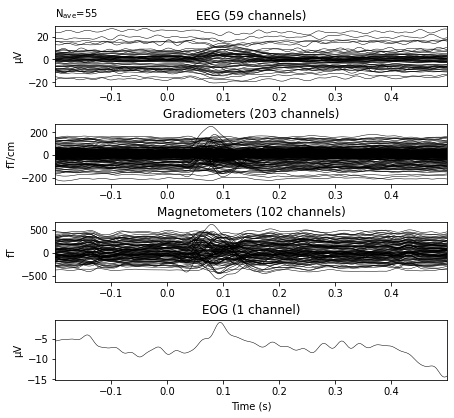

In [29]:
evokeds_list[0].plot();

La fonction [Evoked.plot_topomap()](https://mne.tools/stable/generated/mne.Evoked.html?highlight=plot_topomap#mne.Evoked.plot_topomap) permet de créer une topomap directement.

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


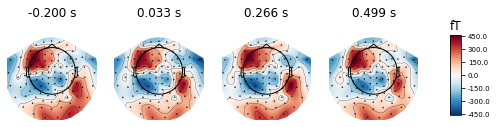

In [30]:
evokeds_list[0].plot_topomap();

# Conclusion
Les objets Raw, Epochs et Evoked offrent encore beaucoup d'autres options. Dans la prochaine activité, nous verrons comment pré-traîter des données MEG afin de les nettoyer en vue d'une analyse de potentiels évoqués et d'oscillation.